This is a jupyter notebook about the implementation and comparison between kernel PCA and PCA. The dataset is made of two nested circles. 

Here we import the used libaries

In [23]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

Here we make our test and training data, it is plottet below. 

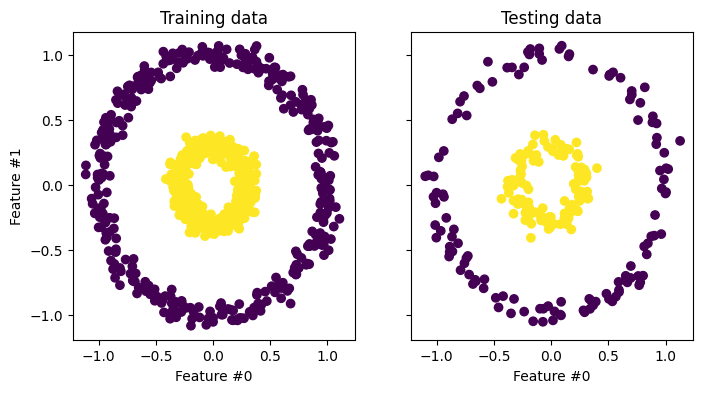

In [24]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")



There are no straight lines that can seperate the two circles from eachother, for comparison, we will use PCA with and without kernel to see what the effect of using kernel is.
Note the kernel used in this example is a radial basis function (RBF) kernel, on the wiki page the Gram kernel is used. 

In [25]:
# %%
# The samples from each class cannot be linearly separated: there is no
# straight line that can split the samples of the inner set from the outer
# set.
#
# Now, we will use PCA with and without a kernel to see what is the effect of
# using such a kernel. The kernel used here is a radial basis function (RBF)
# kernel.
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

We now plot the data

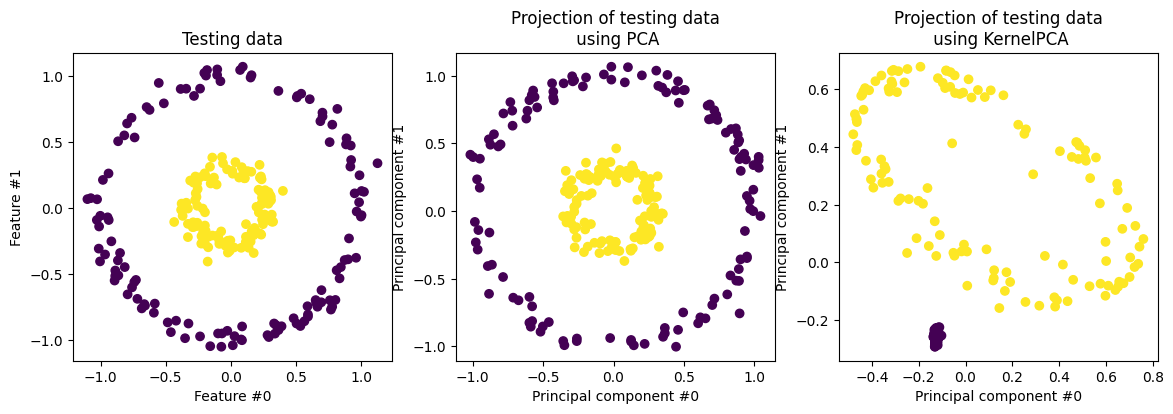

In [26]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")


When looking at the plots, it is important to recall PCA transforms the data linearly, therefore the middle plot has only rotated the plot, this would help define classifier to distinguish the data from both circles. 

Using the kernel PCA allows to make the non linear projection into the koordinate system. Here, by using kernel PCA, we expect to see the data projected that is projected tighter together describes the most variation in the dataset, therefore the outer circle explains the most variance as seen in the testing data. Now, we can use a linear classifier to separate the samples from the two classes. Projecting into the original feature space.

With PCA, we can reconstruct the original dataset by using the same number of components as the original dataset was on the dataset that has been through PCA. This is done below.

In [27]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

We plot the three plots below.

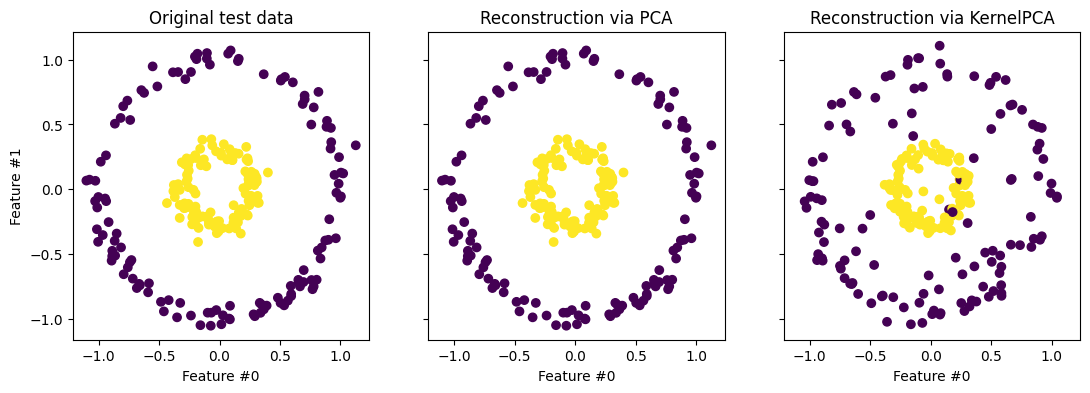

In [28]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

We can see in the new plots, that the reconstruction by PCA looks exactly as the original dataset, this is because, the data could be linear seperated, therefore it wass only rotated, and therefore easy to reconstruct. As kernel is made to reconstruct the dataset from the new principal components, therefore it is harder to reconstruct kernel PCA than normal linear PCA.  